In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
import pandas as pd

In [4]:
df = pd.read_csv('data.csv', delimiter=',', header=0)
    
df = df.drop(['tanggal', 'kelurahan', 'kecamatan'], axis=1)
df.head()

,latitude,longitude,wilayah
0,-6.140977,106.766575,Kota Administrasi Jakarta Barat
1,-6.112499,106.899001,Kota Administrasi Jakarta Utara
2,-6.118336,106.916949,Kota Administrasi Jakarta Utara
3,-6.201144,106.839852,Kota Administrasi Jakarta Pusat
4,-6.167022,106.934411,Kota Administrasi Jakarta Timur


In [5]:
df.dtypes

latitude     float64
longitude    float64
wilayah       object
dtype: object

In [8]:
df['wilayah'] = df['wilayah'].astype('category')

df.head(40)

,latitude,longitude,wilayah
0,-6.140977,106.766575,Kota Administrasi Jakarta Barat
1,-6.112499,106.899001,Kota Administrasi Jakarta Utara
2,-6.118336,106.916949,Kota Administrasi Jakarta Utara
3,-6.201144,106.839852,Kota Administrasi Jakarta Pusat
4,-6.167022,106.934411,Kota Administrasi Jakarta Timur
5,-6.281133,106.816408,Kota Administrasi Jakarta Selatan
6,-6.151604,106.817043,Kota Administrasi Jakarta Barat
7,-6.140936,106.840674,Kota Administrasi Jakarta Utara
8,-6.115515,106.689156,Kota Administrasi Jakarta Barat
9,-6.177591,106.815039,Kota Administrasi Jakarta Pusat


In [9]:
df.dtypes

latitude      float64
longitude     float64
wilayah      category
dtype: object

In [10]:
cat_columns = df.select_dtypes(['category']).columns
cat_columns

Index(['wilayah'], dtype='object')

In [11]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df.head(30)

,latitude,longitude,wilayah
0,-6.140977,106.766575,0
1,-6.112499,106.899001,4
2,-6.118336,106.916949,4
3,-6.201144,106.839852,1
4,-6.167022,106.934411,3
5,-6.281133,106.816408,2
6,-6.151604,106.817043,0
7,-6.140936,106.840674,4
8,-6.115515,106.689156,0
9,-6.177591,106.815039,1


3    335
0    305
2    304
4    253
1    185
Name: wilayah, dtype: int64
Proportion :  1.65 : 1
--------Plot wilayah--------


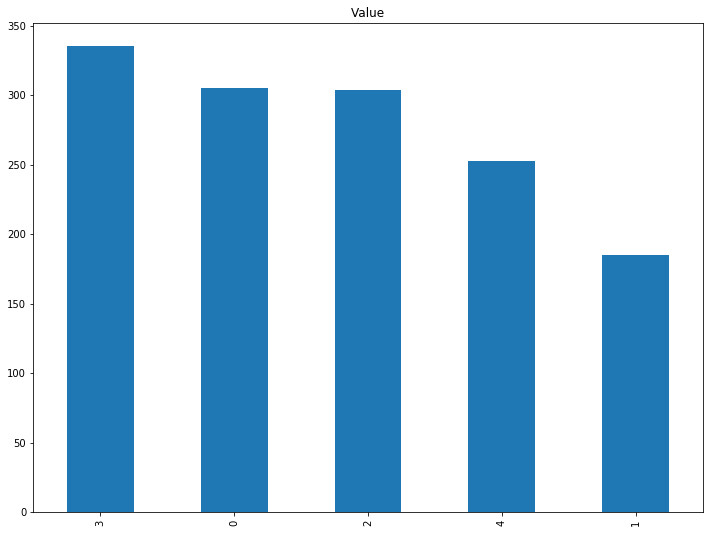

In [12]:
print(df['wilayah'].value_counts())
target_count = df.wilayah.value_counts()
print('Proportion : ', round(target_count[0]/target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Value', figsize=(12, 9))
print('--------Plot wilayah--------')

In [16]:
# Define max_distance (eps parameter in DBSCAN())
db = DBSCAN(eps=0.5, min_samples=25).fit(df)

# Extract a mask of core cluster members
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Extract labels (-1 is used for outliers)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_cluster = n_clusters + 1
unique_labels = set(labels)
n_noise_ = list(labels).count(-1)

In [17]:
print('Estimated number of clusters: %d' % n_clusters)
print('Total Data : ', len(df))
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df, labels))

Estimated number of clusters: 5
Total Data :  1382
Estimated number of noise points: 1
Silhouette Coefficient: 0.939


In [20]:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

print('Couster Found : ', n_clusters)
for k, col in zip(unique_labels, colors):
    if k == 1:
        # block used noise.
        col = [0, 0, 0, 1]
        
    class_member_mask = (labels == k)
    xy = df[class_member_mask & core_samples_mask]
    print('\n', xy,'\nMember of Cluster : ', len(xy))


Couster Found :  5

       latitude   longitude  wilayah
0    -6.140977  106.766575        0
6    -6.151604  106.817043        0
8    -6.115515  106.689156        0
13   -6.172152  106.727857        0
16   -6.161853  106.731459        0
20   -6.137717  106.817233        0
37   -6.178142  106.734318        0
42   -6.156404  106.805838        0
43   -6.155694  106.706478        0
45   -6.191651  106.792097        0
50   -6.176089  106.770427        0
52   -6.157918  106.803523        0
54   -6.135973  106.802100        0
57   -6.189098  106.791541        0
59   -6.172232  106.770324        0
69   -6.155748  106.709032        0
77   -6.109837  106.714758        0
79   -6.146789  106.804501        0
81   -6.110371  106.714184        0
84   -6.142265  106.737992        0
89   -6.134419  106.699914        0
90   -6.171351  106.740852        0
100  -6.135537  106.749751        0
103  -6.172287  106.786211        0
104  -6.186903  106.730021        0
109  -6.131655  106.808914        0
112  -6